In [14]:
%load_ext autoreload
%autoreload 2

import svgwrite
from IPython.display import SVG
from scraperTools import getDataFromFile, getNthFromFile
import cairosvg



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
pcbTracks = getNthFromFile("./model data/trainOutput.data", 2)

print(len(pcbTracks))

358


In [16]:
print(pcbTracks[1])
minx = pcbTracks[0][3]
miny = pcbTracks[0][4]
for track in pcbTracks:
    if track[3] < minx:
        minx = track[3]
    if track[5] < minx:
        minx = track[5]
    if track[4] < miny:
        miny < track[4]
    if track[6] < miny:
        miny = track[6]
print(minx,miny)

[1.0236, 2, 'USB_0', 4057.77, 3917.75, 4062.45, 3913.07]
4054.51 3863.75


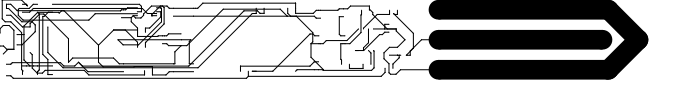

In [17]:
dwg = svgwrite.Drawing('test.svg', profile='tiny', size = (700,100))


for track in pcbTracks:
    p1 = (track[3]-minx,track[4]-miny)
    p2 = (track[5]-minx, track[6]-miny)
    width = track[0]

    dwg.add(dwg.line(start=p1, end=p2, stroke_width = width, stroke="black"))
    dwg.add(dwg.circle(center=p1, r = width/2))
    dwg.add(dwg.circle(center=p2, r = width/2))

dwg.save()
SVG('test.svg')

In [18]:
import io
print(dwg.tostring())
fileobj = io.open(dwg.filename, mode='w', encoding='utf-8')


cx="26.69" cy="4.31" r="0.5118" /><line stroke="black" stroke-width="1.0236" x1="27.38" x2="26.69" y1="5.86" y2="5.18" /><circle cx="27.38" cy="5.86" r="0.5118" /><circle cx="26.69" cy="5.18" r="0.5118" /><line stroke="black" stroke-width="1.0236" x1="26.69" x2="22.49" y1="4.31" y2="4.31" /><circle cx="26.69" cy="4.31" r="0.5118" /><circle cx="22.49" cy="4.31" r="0.5118" /><line stroke="black" stroke-width="1.0236" x1="88.84" x2="144.55" y1="74.95" y2="74.95" /><circle cx="88.84" cy="74.95" r="0.5118" /><circle cx="144.55" cy="74.95" r="0.5118" /><line stroke="black" stroke-width="1.0236" x1="84.23" x2="88.84" y1="70.34" y2="74.95" /><circle cx="84.23" cy="70.34" r="0.5118" /><circle cx="88.84" cy="74.95" r="0.5118" /><line stroke="black" stroke-width="1.0236" x1="45.18" x2="84.23" y1="70.34" y2="70.34" /><circle cx="45.18" cy="70.34" r="0.5118" /><circle cx="84.23" cy="70.34" r="0.5118" /><line stroke="black" stroke-width="1.0236" x1="144.55" x2="144.55" y1="74.95" y2="70.75" /><circl

In [19]:
pcbPNGbyte = cairosvg.svg2png(bytestring=dwg.tostring())

In [20]:
import numpy as np
import io
from PIL import Image

pcbPNG = Image.open(io.BytesIO(pcbPNGbyte)).convert('LA')

pcbMatrix = np.array(pcbPNG) 

pcbMatrixOnes = np.zeros(np.shape(pcbMatrix)[0:2], dtype=np.int16)

for row in range(len(pcbMatrix[0])):
    for col in range(len(pcbMatrix[0][0])):
        if pcbMatrix[col][row][1] => 10:
            pcbMatrixOnes[col][row] = 1

In [33]:
print(pcbPNG)
pcbPNG.save("test2.png")
print(np.shape(pcbMatrix)[0:2])
print(pcbMatrix)

<PIL.Image.Image image mode=LA size=700x100 at 0x7F76F3112700>
(100, 700)
[[[  0   0]
  [  0 102]
  [  0 249]
  ...
  [  0   0]
  [  0   0]
  [  0   0]]

 [[  0   0]
  [  0  70]
  [  0 192]
  ...
  [  0   0]
  [  0   0]
  [  0   0]]

 [[  0   0]
  [  0  70]
  [  0 192]
  ...
  [  0   0]
  [  0   0]
  [  0   0]]

 ...

 [[  0   0]
  [  0   0]
  [  0   0]
  ...
  [  0   0]
  [  0   0]
  [  0   0]]

 [[  0   0]
  [  0   0]
  [  0   0]
  ...
  [  0   0]
  [  0   0]
  [  0   0]]

 [[  0   0]
  [  0   0]
  [  0   0]
  ...
  [  0   0]
  [  0   0]
  [  0   0]]]


In [31]:
print(pcbMatrixOnes)

[[    0 65510 65510 ...     0     0     0]
 [    0 65510 65510 ...     0     0     0]
 [    0     0     0 ...     0     0     0]
 ...
 [    0     0     0 ...     0     0     0]
 [    0     0     0 ...     0     0     0]
 [    0     0     0 ...     0     0     0]]


In [32]:
Image.fromarray(pcbMatrixOnes*65510).save("pcbBitMap.tif")
import imageio

imageio.imsave('bitMap.jpg', pcbMatrixOnes)

Lossy conversion from int16 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [24]:
from scipy.signal import convolve2d

autoCorrelation = convolve2d(pcbMatrixOnes,np.fliplr(pcbMatrixOnes))

In [25]:
np.savetxt("filename.txt", pcbMatrixOnes, newline=" ")

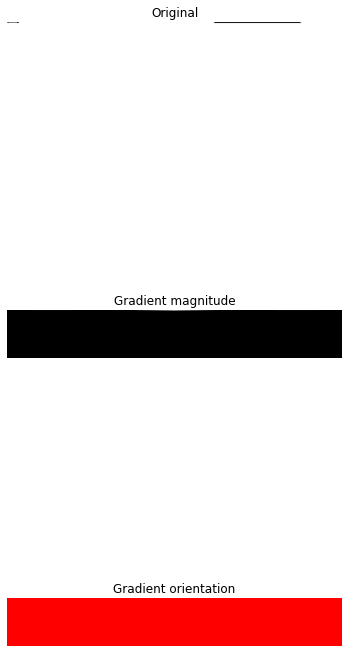

In [26]:
import matplotlib.pyplot as plt
fig, (ax_orig, ax_mag, ax_ang) = plt.subplots(3, 1, figsize=(6, 15))
ax_orig.imshow((pcbMatrixOnes*-1 + 1)*178, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_mag.imshow(np.absolute(autoCorrelation), cmap='gray')
ax_mag.set_title('Gradient magnitude')
ax_mag.set_axis_off()
ax_ang.imshow(np.angle(autoCorrelation), cmap='hsv') # hsv is cyclic, like angles
ax_ang.set_title('Gradient orientation')
ax_ang.set_axis_off()
fig.show()

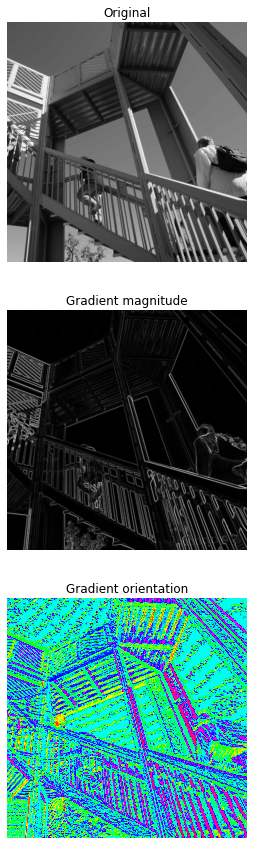

In [27]:
from scipy import signal
from scipy import misc
ascent = misc.ascent()
scharr = np.array([[ -3-3j, 0-10j,  +3 -3j],
                   [-10+0j, 0+ 0j, +10 +0j],
                   [ -3+3j, 0+10j,  +3 +3j]]) # Gx + j*Gy
grad = signal.convolve2d(ascent, scharr, boundary='symm', mode='same')

import matplotlib.pyplot as plt
fig, (ax_orig, ax_mag, ax_ang) = plt.subplots(3, 1, figsize=(6, 15))
ax_orig.imshow(ascent, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_mag.imshow(np.absolute(grad), cmap='gray')
ax_mag.set_title('Gradient magnitude')
ax_mag.set_axis_off()
ax_ang.imshow(np.angle(grad), cmap='hsv') # hsv is cyclic, like angles
ax_ang.set_title('Gradient orientation')
ax_ang.set_axis_off()
fig.show()

In [28]:
print(type(ascent[0][0]))
print(ascent)
print((pcbMatrixOnes*-1 + 1)*178)

<class 'numpy.int64'>
[[ 83  83  83 ... 117 117 117]
 [ 82  82  83 ... 117 117 117]
 [ 80  81  83 ... 117 117 117]
 ...
 [178 178 178 ...  57  59  57]
 [178 178 178 ...  56  57  57]
 [178 178 178 ...  57  57  58]]
[[178   0   0 ... 178 178 178]
 [178   0   0 ... 178 178 178]
 [178 178 178 ... 178 178 178]
 ...
 [178 178 178 ... 178 178 178]
 [178 178 178 ... 178 178 178]
 [178 178 178 ... 178 178 178]]
